# Sentiment Analysis using NLTK 'Vader' and Naive Bayes

In this notebook we will run through some very simple NLP processing and use the built in 'Vader Sentiment Analayzer' to categorize the threads. There are two types of sentiment analyzing approaches - Polarity and Valence based.
VADER is a VALENCE based sentiment analyzer.
<img src='vader.jpg' width=30% />

paper: http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf



In [9]:
%%time
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark', context='talk', palette='Dark2')
from wordcloud import WordCloud,STOPWORDS
# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')
from tqdm import tqdm




Wall time: 167 ms


### Gather Data

In [10]:

# Need to gather data so we will use the movie review dataset intially.I went ahead and merged the data beforehand 
# Once we get the reddit threads, we can try with that
movie_df=pd.read_csv('../data/movie_data/imdb_master.csv',encoding="latin-1")
movie_df.head()

,id,type,review,sentiment
0,0,test,Once again Mr. Costner has dragged out a movie...,neg
1,1,test,This is an example of why the majority of acti...,neg
2,2,test,"First of all I hate those moronic rappers, who...",neg
3,3,test,Not even the Beatles could write songs everyon...,neg
4,4,test,Brass pictures (movies is not a fitting word f...,neg


### Let's look at the sentiment ditribution

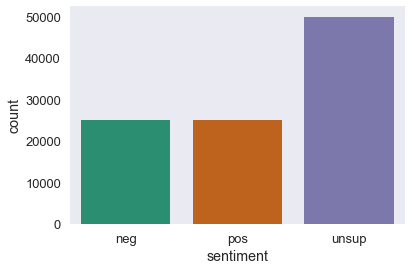

In [11]:
p = sns.countplot(data=movie_df, x = 'sentiment')

In [12]:
#We'll remove the unsup so we can see how vader does for just the pos and neg
movie_df = movie_df[movie_df.sentiment != 'unsup']

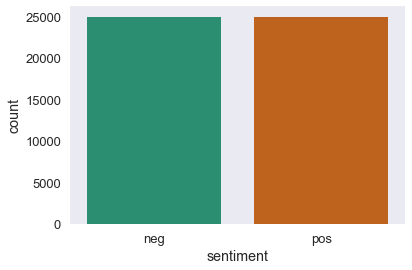

In [13]:
p = sns.countplot(data=movie_df, x = 'sentiment')

### Run Vader
<img src='vader.gif' width=30% />

In [14]:
movie_df.head()

,id,type,review,sentiment
0,0,test,Once again Mr. Costner has dragged out a movie...,neg
1,1,test,This is an example of why the majority of acti...,neg
2,2,test,"First of all I hate those moronic rappers, who...",neg
3,3,test,Not even the Beatles could write songs everyon...,neg
4,4,test,Brass pictures (movies is not a fitting word f...,neg


In [17]:
%%time

i=0 #counter
compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores

while (i<len(movie_df)):
    k = analyzer.polarity_scores(movie_df.iloc[i]['review'])
    compval1.append(k['compound'])    
    i = i+1
#converting sentiment values to numpy for easier usage
compval1 = np.array(compval1)
len(compval1)

Wall time: 2min 49s


In [18]:
movie_df['vader_score']=compval1

In [19]:
movie_df.head()

,id,type,review,sentiment,vader_score
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,-0.5349
1,1,test,This is an example of why the majority of acti...,neg,0.6582
2,2,test,"First of all I hate those moronic rappers, who...",neg,-0.8970
3,3,test,Not even the Beatles could write songs everyon...,neg,0.9306
4,4,test,Brass pictures (movies is not a fitting word f...,neg,0.9695


### Convert score to categories 

In [20]:
%%time
i = 0
predicted_value = [ ] 

while (i<len(movie_df)):
    if ((movie_df.iloc[i]['vader_score'] >= 0.7)):
        predicted_value.append('pos')
        i = i+1
    elif ((movie_df.iloc[i]['vader_score'] > 0) & (movie_df.iloc[i]['vader_score'] < 0.7)):
        predicted_value.append('neu')
        i = i+1
    elif ((movie_df.iloc[i]['vader_score'] <= 0)):
        predicted_value.append('neg')
        i = i+1


0it [00:00, ?it/s]


Wall time: 18.6 s


In [21]:
movie_df['predicted_sentiment'] = predicted_value

In [22]:
movie_df.head()

,id,type,review,sentiment,vader_score,predicted_sentiment
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,-0.5349,neg
1,1,test,This is an example of why the majority of acti...,neg,0.6582,neu
2,2,test,"First of all I hate those moronic rappers, who...",neg,-0.8970,neg
3,3,test,Not even the Beatles could write songs everyon...,neg,0.9306,pos
4,4,test,Brass pictures (movies is not a fitting word f...,neg,0.9695,pos


In [23]:
#convert sentiment to int
movie_df['sent_int'] = 0
movie_df.loc[movie_df['sentiment'] == 'pos', 'sent_int'] = 1
movie_df.loc[movie_df['sentiment'] == 'neg', 'sent_int'] = -1
movie_df.head()

,id,type,review,sentiment,vader_score,predicted_sentiment,sent_int
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,-0.5349,neg,-1
1,1,test,This is an example of why the majority of acti...,neg,0.6582,neu,-1
2,2,test,"First of all I hate those moronic rappers, who...",neg,-0.8970,neg,-1
3,3,test,Not even the Beatles could write songs everyon...,neg,0.9306,pos,-1
4,4,test,Brass pictures (movies is not a fitting word f...,neg,0.9695,pos,-1


In [24]:
movie_df['pred_sent_int'] = 0
movie_df.loc[movie_df['predicted_sentiment'] == 'pos', 'pred_sent_int'] = 1
movie_df.loc[movie_df['predicted_sentiment'] == 'neg', 'pred_sent_int'] = -1
movie_df.head()

,id,type,review,sentiment,vader_score,predicted_sentiment,sent_int,pred_sent_int
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,-0.5349,neg,-1,-1
1,1,test,This is an example of why the majority of acti...,neg,0.6582,neu,-1,0
2,2,test,"First of all I hate those moronic rappers, who...",neg,-0.8970,neg,-1,-1
3,3,test,Not even the Beatles could write songs everyon...,neg,0.9306,pos,-1,1
4,4,test,Brass pictures (movies is not a fitting word f...,neg,0.9695,pos,-1,1


### Lets compare the predicted sentiment to the labeled sentiment

In [25]:
print(movie_df.sentiment.value_counts())
print(movie_df.predicted_sentiment.value_counts())

neg    25000
pos    25000
Name: sentiment, dtype: int64
pos    27544
neg    16991
neu     5465
Name: predicted_sentiment, dtype: int64


In [28]:
movie_df['compare'] = movie_df.apply(lambda x: 'incorrect' if x['pred_sent_int'] == 1 else 'correct', axis=1)

In [29]:
movie_df.head()

,id,type,review,sentiment,vader_score,predicted_sentiment,sent_int,pred_sent_int,compare
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,-0.5349,neg,-1,-1,correct
1,1,test,This is an example of why the majority of acti...,neg,0.6582,neu,-1,0,correct
2,2,test,"First of all I hate those moronic rappers, who...",neg,-0.8970,neg,-1,-1,correct
3,3,test,Not even the Beatles could write songs everyon...,neg,0.9306,pos,-1,1,incorrect
4,4,test,Brass pictures (movies is not a fitting word f...,neg,0.9695,pos,-1,1,incorrect


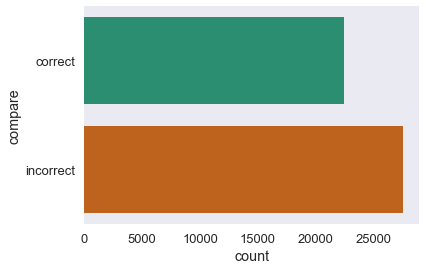

In [30]:
p=sns.countplot(data=movie_df, y='compare')

In [31]:
print(movie_df.compare.value_counts())

incorrect    27544
correct      22456
Name: compare, dtype: int64


In [32]:
print("% correct: " +  )

SyntaxError: invalid syntax (<ipython-input-32-304cc17e69f3>, line 1)

### Cleanup and reflect


In [33]:
movie_df.drop(['vader_score', 'sent_int', 'pred_sent_int'], axis=1)
movie_df.head()

,id,type,review,sentiment,vader_score,predicted_sentiment,sent_int,pred_sent_int,compare
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,-0.5349,neg,-1,-1,correct
1,1,test,This is an example of why the majority of acti...,neg,0.6582,neu,-1,0,correct
2,2,test,"First of all I hate those moronic rappers, who...",neg,-0.8970,neg,-1,-1,correct
3,3,test,Not even the Beatles could write songs everyon...,neg,0.9306,pos,-1,1,incorrect
4,4,test,Brass pictures (movies is not a fitting word f...,neg,0.9695,pos,-1,1,incorrect


In [34]:
movie_df.head()

,id,type,review,sentiment,vader_score,predicted_sentiment,sent_int,pred_sent_int,compare
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,-0.5349,neg,-1,-1,correct
1,1,test,This is an example of why the majority of acti...,neg,0.6582,neu,-1,0,correct
2,2,test,"First of all I hate those moronic rappers, who...",neg,-0.8970,neg,-1,-1,correct
3,3,test,Not even the Beatles could write songs everyon...,neg,0.9306,pos,-1,1,incorrect
4,4,test,Brass pictures (movies is not a fitting word f...,neg,0.9695,pos,-1,1,incorrect
